In [3]:
from quantecon.distributions import BetaBinomial

import numpy as np
from numba import njit
from collections import namedtuple

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [1]:
# NamedTuple Model
Model = namedtuple("Model", ("n", "w_vals", "φ", "β", "c"))


def create_job_search_model(
        n=50,        # wage grid size
        w_min=10.0,  # lowest wage
        w_max=60.0,  # highest wage
        a=200,       # wage distribution parameter
        b=100,       # wage distribution parameter
        β=0.96,      # discount factor
        c=10.0       # unemployment compensation
    ):
    """
    Creates the parameters for job search model and returns the
    instance of namedtuple Model
    """
    w_vals = np.linspace(w_min, w_max, n+1)
    φ = BetaBinomial(n, a, b).pdf()
    return Model(n=n, w_vals=w_vals, φ=φ, β=β, c=c)


@njit
def v_1(w, model):
    """
    Computes lifetime value at t=1 given current wage w_1 = w
    """
    β, c = model.β, model.c
    s = np.maximum(c, model.w_vals)
    h_1 = c + β * np.sum(s * model.φ)
    return np.maximum(w + β * w, h_1)


@njit
def res_wage(model):
    """
    Computes reservation wage at t=1
    """
    β, c = model.β, model.c
    s = np.maximum(c, model.w_vals)
    h_1 = c + β * np.sum(s * model.φ)
    return h_1 / (1 + β)



##### Plots #####
plt.rcParams.update({"text.usetex": True, "font.size": 14})


default_model = create_job_search_model()


def fig_dist(model=default_model, fs=10):
    """
    Plot the distribution of wages
    """
    fig, ax = plt.subplots()
    ax.plot(model.w_vals, model.φ, "-o", alpha=0.5, label="wage distribution")
    ax.legend(loc="upper left", fontsize=fs)


def fig_v1(model=default_model, savefig=False,
                  figname="./figures/iid_job_search_0_py.pdf", fs=18):
    """
    Plot two-period value function and res wage
    """
    n, w_vals, φ, β, c = model

    v = [v_1(w, model) for w in w_vals]
    w_star = res_wage(model)
    s = np.maximum(c, w_vals)
    continuation_val = c + β * np.sum(s * φ)
    min_w, max_w = np.min(w_vals), np.max(w_vals)

    fontdict = {'fontsize': 10}
    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.set_ylim(0, 120)
    ax.set_xlim(min_w, max_w)
    ax.vlines((w_star,), (0,), (continuation_val,), lw=0.5)
    ax.set_yticks((0, 50, 100))
    ax.set_yticklabels((0, 50, 100), fontdict=fontdict)
    ax.set_xticks((min_w, w_star, max_w))
    ax.set_xticklabels((min_w, r"$w^*_1$", max_w), fontdict=fontdict)
    ax.plot(w_vals, w_vals + β * w_vals, alpha=0.8, linewidth=3,
            label=r"$w_1 + \beta w_1$")
    ax.plot(w_vals, [continuation_val]*(n+1), linewidth=3, alpha=0.8,
            label=r"$c + \beta \sum_{w'} \max\{c, w'\} \varphi(w')$" )
    ax.plot(w_vals, v, "k--", markersize=2, alpha=1.0, linewidth=2,
            label=r"$v_1(w_1)$")
    ax.legend(frameon=False, fontsize=fs, loc="upper left")
    if savefig:
        fig.savefig(figname)

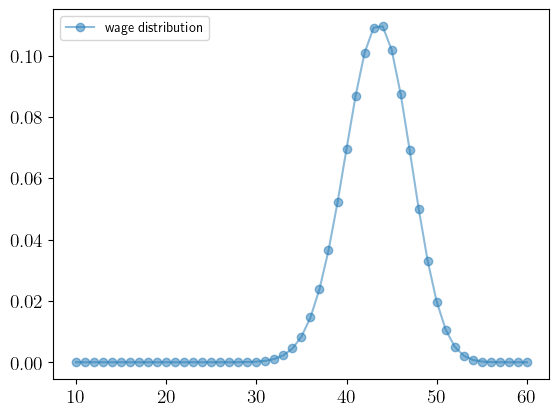

In [5]:
fig_dist()

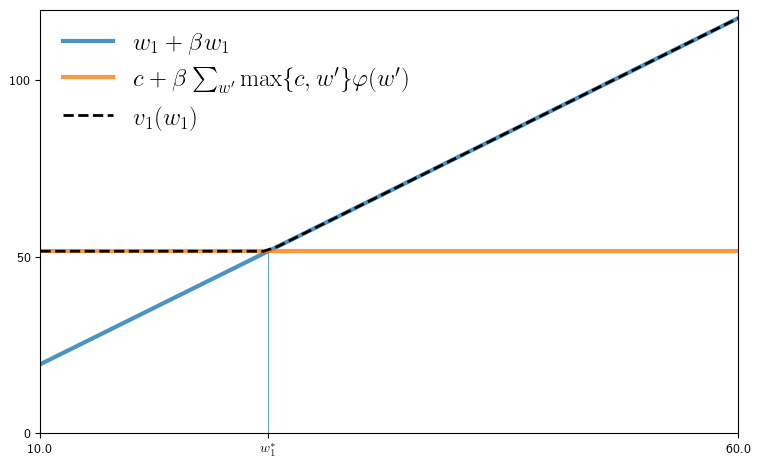

In [2]:
fig_v1()